# Properties of transmission matrix entries

Investigations for symmetric structures in Z plane

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact, plotlogf, plotlogf_real
from scipy.optimize import newton
from IPython.display import Video
plt.style.use('dark_background')
%matplotlib widget

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

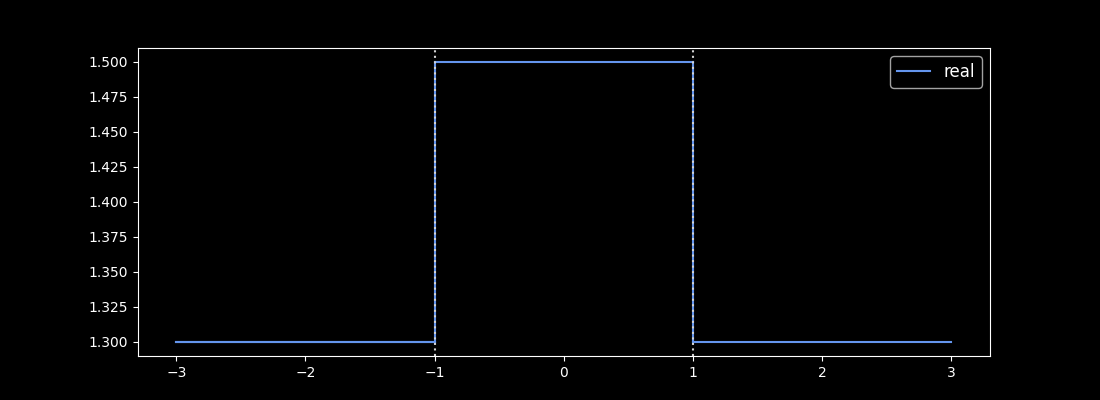

In [96]:
A = SlabExact(symmetric=True)
A.plot_refractive_index()

## Known facts for symmetric guides

Let $$M(Z) = \begin{pmatrix}a & b \\ c & d \end{pmatrix}.$$

- For $Z$ real $$ M \bar{M} = I.$$

- For any $Z \in \mathbb{C}$ $$\det M = 1$$ (In fact this holds for any guide with the same refractive index in both outer regions).

- For $Z$ real, the entries $b$ and $c$ are pure imaginary and $$b = -c.$$  This also means that $$b = \bar{c}.$$

- Again for $Z$ real, the entries $a$ and $d$ are conjugate and $$d = \bar{a}.$$

### Form of transmission matrix for symmetric guides and real Z.

In total, for symmetric waveguides and real $Z$ there exist $a \in \mathbb{C}$ and $\gamma \in\mathbb{R}$ such that

$$M(Z) = \begin{pmatrix}a & i\gamma\\ -i\gamma & \bar{a} \end{pmatrix}.$$


In [97]:
Z =  10 + 2j
M_Z = A.transmission_matrix(Z, Ztype_far_left='standard', Ztype_far_right='standard')
M_Zconj = A.transmission_matrix(Z.conjugate(), Ztype_far_left='standard', Ztype_far_right='standard')

In [98]:
M_Z[0]

array([[ 1.46524198+0.32245735j,  0.43928319+0.62912882j],
       [-0.43928319-0.62912882j,  0.70380763-0.53211646j]])

In [99]:
M_Zconj.conjugate()

array([[[ 0.70380763-0.53211646j, -0.43928319-0.62912882j],
        [ 0.43928319+0.62912882j,  1.46524198+0.32245735j]]])

In [100]:
np.round(M_Z @ M_Zconj.conjugate(), 15)

array([[[ 1.-0.j, -0.+0.j],
        [ 0.+0.j,  1.-0.j]]])

Checking to see if M maintains conjugate coefficients

In [101]:
V1 = np.ones(2)
V2 = np.array([1j, -1j])

In [102]:
M_Z @ V1

array([[1.90452517+0.95158617j, 0.26452444-1.16124528j]])

In [103]:
M_Z @ V2

array([[0.30667147+1.02595879j, 0.09701236-1.14309082j]])

The above yields conjugate results only if Z is real.

## Possible truths

- Seems likely that $$M(\bar{Z}) \bar{M}(Z) = I$$ holds for any $Z\in \mathbb{C}.$

- Also seems likely that entries $b$ and $c$ are equal and opposite for any $Z \in \mathbb{C}.$  They aren't pure imaginary anymore however.

## More complex guide

In [85]:
B = SlabExact(ns=[1.3, 1.4, 1.5, 1.4, 1.3], Ts=[2,1,1,1,2], symmetric=True, xrefs=5*[100])

(<Figure size 1100x400 with 1 Axes>, <Axes: >)

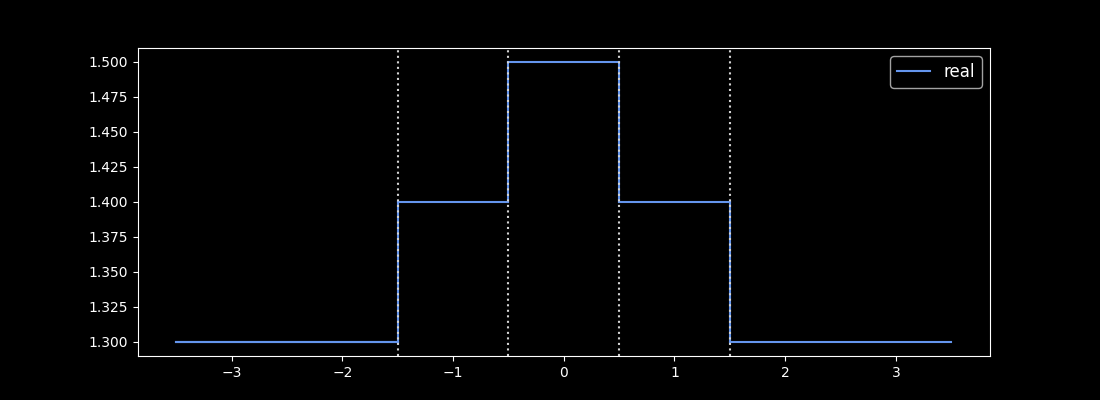

In [86]:
B.plot_refractive_index()

In [87]:
Z = 1+1j
MZ = B.transmission_matrix(Z)
MZconj = B.transmission_matrix(Z.conjugate())

In [88]:
MZ

array([[[-10.21759901-6.9191219j ,  -0.24225184+1.20947393j],
        [  0.24225184-1.20947393j,  -0.1879454 +0.06992079j]]])

In [89]:
MZconj.conjugate()[0]

array([[ -0.1879454 +0.06992079j,   0.24225184-1.20947393j],
       [ -0.24225184+1.20947393j, -10.21759901-6.9191219j ]])

In [90]:
np.round(MZ @ MZconj.conjugate(), 12)[0]

array([[ 1.+0.j,  0.-0.j],
       [-0.-0.j,  1.+0.j]])

## Inverse property fails if symmetric is False

But b = -c still and all, so even and odd modes are possible.  However, this only holds if the guide is symmetric.  Are the modes still even and odd anyway?

In [46]:
Eig = B.normalizer('eigvec')
Ours = B.normalizer('ours')

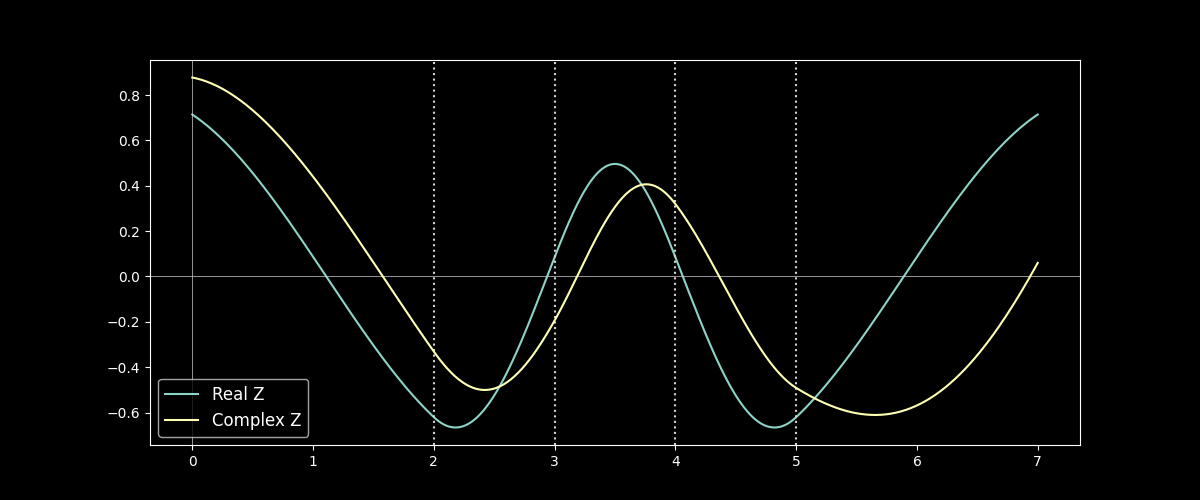

In [50]:
B.plot_field_1d(B.fields(1, mode_type='radiation', Normalizer=Ours), label='Real Z')
B.add_1d_plot(B.fields(1+.3j, mode_type='radiation', Normalizer=Ours), label='Complex Z')

## Observations

If we put symmetric = False:  

- For real Z, the modes are still even and odd.  The transmission matrix still has equal and opposite off-diagonal entries.

- For complex Z, the modes are no longer even and odd.  M has totally different off-diagonal entries.

If symmetric = True:

- For any value of Z the modes are even and odd.

My goal would be to have even and odd modes whenever possible, not just when we center our waveguide at zero.  It's remarkable that the modes are still even and odd for real Z when the geometry isn't symmetrized.  What fails about the complex case?

In [52]:
Z = 1
MZ = B.transmission_matrix(Z)
MZ @ V1, MZ @ V2

(array([[-0.27668507-0.49598103j, -0.27668507+0.49598103j]]),
 array([[1.41505622-1.07761129j, 1.41505622+1.07761129j]]))

Even in non-symmetrized case, M yields conjugate coefficients for real Z.

## Further Observations

So for symmetric guide, we can have all even and odd modes (even for complex Z), although for complex Z the coefficients are no longer conjugate.  I think we can prove this using that the inverse of M(Z) is M(-Z) for symmetric guides

In [53]:
Bsym = SlabExact(ns=[1.3, 1.4, 1.5, 1.4, 1.3], Ts=[2,1,1,1,2], symmetric=True, xrefs=5*[100])
Bnonsym = SlabExact(ns=[1.3, 1.4, 1.5, 1.4, 1.3], Ts=[2,1,1,1,2], symmetric=False, xrefs=5*[100])

In [55]:
Z = 1+1j
MZsym = Bsym.transmission_matrix(Z)
MZsym_minus = Bsym.transmission_matrix(-Z)

MZsym @ MZsym_minus

array([[[ 1.00000000e+00+0.00000000e+00j,
          3.04611397e-15-3.55271368e-15j],
        [-2.82493404e-17-1.11022302e-16j,
          1.00000000e+00+4.44089210e-16j]]])

In [56]:
MZsym, MZsym_minus

(array([[[-10.21759901-6.9191219j ,  -0.24225184+1.20947393j],
         [  0.24225184-1.20947393j,  -0.1879454 +0.06992079j]]]),
 array([[[ -0.1879454 +0.06992079j,   0.24225184-1.20947393j],
         [ -0.24225184+1.20947393j, -10.21759901-6.9191219j ]]]))

In [58]:
Z = 1+1j
MZnonsym = Bnonsym.transmission_matrix(Z)
MZnonsym_minus = Bnonsym.transmission_matrix(-Z)

MZnonsym @ MZnonsym_minus

array([[[-9.28996045e+05+1.57640478e+06j,
          1.26917005e+03-1.66437982e+04j],
        [-2.08252458e+02-1.73812124e+02j,
          2.40414155e+00+5.85993341e-01j]]])

Right, it works, but I forget now how this would help.  We can put in -Z to model and then move the - sign to the xs, so it flips them all, and that can show that we get the inverse for M(Z), but I don't know what form that inverse has...

## Non-symmetric guide

In [59]:
C = SlabExact(ns=[1.3, 1.4, 1.5, 1.3], Ts=[1,1,1,1], symmetric=True, xrefs=4*[10])

In [61]:
Z = 10 + 5j
MZ = C.transmission_matrix(Z)
MZconj = C.transmission_matrix(Z.conjugate())

In [62]:
MZ

array([[[ 6.41998915e+03-3.43032274e+04j,
          1.88506937e+02+1.52895570e+02j],
        [-9.24703013e+01-7.33575486e+01j,
          7.54932244e-01-3.22445051e-01j]]])

In [63]:
MZconj.conjugate()

array([[[ 7.54932244e-01-3.22445051e-01j,
         -9.24703013e+01-7.33575486e+01j],
        [ 1.88506937e+02+1.52895570e+02j,
          6.41998915e+03-3.43032274e+04j]]])

In [64]:
MZ @ MZconj.conjugate()

array([[[ 5.94356105e+03+2.96770448e+04j,
          3.34496498e+06-2.78373332e+06j],
        [ 9.81477942e+01+2.90792787e+01j,
         -3.04482241e+03-1.43999169e+04j]]])

### Definitely doesn't work for this one

Which is okay, we don't expect even and odd modes here.

## Guide with different outer indices of refraction

In [65]:
D = SlabExact(ns=[1.3, 1.4, 1.2], Ts=[1,1,1], symmetric=True, xrefs=3*[10])

In [67]:
Z = 10 + 5j
MZ = D.transmission_matrix(Z)
MZconj = D.transmission_matrix(Z.conjugate())

In [68]:
MZ

array([[[ 2.84692554+0.33301498j, -0.01200436-1.8232415j ],
        [ 0.10477512+0.87729552j,  0.89427337-0.17890571j]]])

In [69]:
MZconj.conjugate()

array([[[ 0.89427337-0.17890571j,  0.10477512+0.87729552j],
        [-0.01200436-1.8232415j ,  2.84692554+0.33301498j]]])

In [70]:
MZ @ MZconj.conjugate()

array([[[-0.71855747-0.16775113j,  0.57912566-2.66214372j],
        [-0.08627271-0.86253152j,  1.84683838-0.02768732j]]])